In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_CSV_FILES/austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.set_index("Date").sort_index()
df.head(1)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"


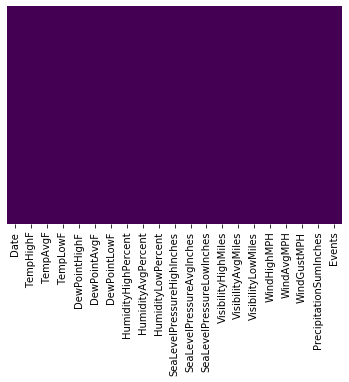

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [5]:
columns_of_interest = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH', 'PrecipitationSumInches']

In [6]:
data = df[columns_of_interest]
events = df[['Events']].replace(' ', 'None')

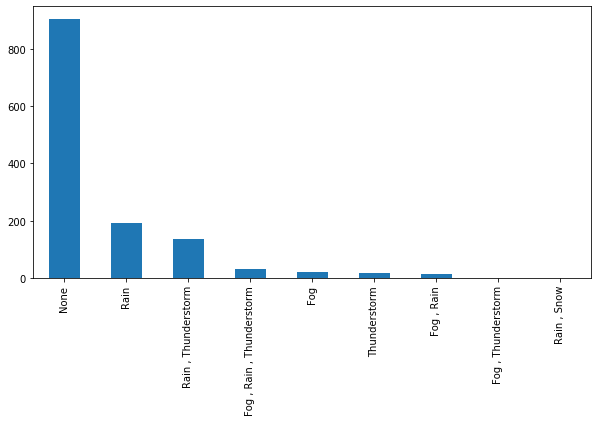

In [7]:
events.Events.value_counts().plot(kind = 'bar', figsize = (10,5))

In [8]:
unique_events = set()
for value in events.Events.value_counts().index:
    splitted = [x.strip() for x in value.split(',')]
    unique_events.update(splitted)
unique_events

{'Fog', 'None', 'Rain', 'Snow', 'Thunderstorm'}

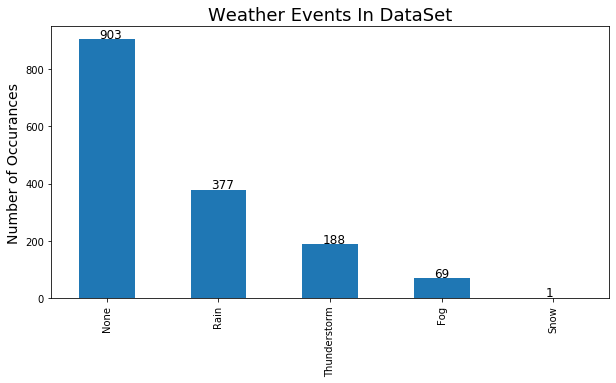

In [9]:
single_events = pd.DataFrame()

for event_type in unique_events:
    event_occured = events.Events.str.contains(event_type)
    single_events = pd.concat([single_events, pd.DataFrame(data = {event_type : event_occured.values})], join = 'outer', axis = 1)

ax = single_events.sum().sort_values(ascending = False).plot.bar(figsize = (10,5))
ax.set_title("Weather Events In DataSet", fontsize = 18)
ax.set_ylabel("Number of Occurances", fontsize = 14)
for i in ax.patches:
    ax.text(i.get_x()+0.18, i.get_height()+5, i.get_height(), fontsize = 12)

In [10]:
single_events.head()

,Rain,Snow,Fog,Thunderstorm,None
0,True,False,False,True,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [11]:
precipitation = data[pd.to_numeric(data.PrecipitationSumInches, errors='coerce').isnull()].PrecipitationSumInches.value_counts()
precipitation

T    124
Name: PrecipitationSumInches, dtype: int64

In [12]:
def isColumnNotNumeric(columns_of_interest, data):
    result = np.zeros(data.shape[0], dtype = bool)
    for column_name in columns_of_interest:
        result = result | pd.to_numeric(data[column_name], errors = 'coerce').isnull()
    return result
def getDataFrameWithNonNumericRows(dataframe):
    return data[isColumnNotNumeric(columns_of_interest, data)]

non_numeric_rows_count = getDataFrameWithNonNumericRows(data).shape[0]

print("Non Numeric rows:{0}".format(non_numeric_rows_count))

Non Numeric rows:134


In [13]:
def numberorzero(value):
    try:
        parsed = flot(value)
        return parsed
    except:
        return 0

In [14]:
data['PrecipitationSumInches'] = df['PrecipitationSumInches']

has_precipitation_trace_series = isColumnNotNumeric(['PrecipitationSumInches'], data).astype(int)
data = data.assign(PrecipitationTrace = has_precipitation_trace_series.values)

data['PrecipitationSumInches'] = data['PrecipitationSumInches'].apply(numberorzero)
data.iloc[0:10, :]

C:\Users\varun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,PrecipitationTrace
0,60,49,75,29.68,7,4,0,0
1,48,36,68,30.13,10,6,0,0
2,45,27,52,30.49,10,3,0,0
3,46,28,56,30.45,10,4,0,0
4,50,40,71,30.33,10,2,0,1
5,48,36,63,30.4,9,3,0,0
6,53,39,65,30.39,9,1,0,1
7,51,39,64,30.17,10,2,0,1
8,50,41,76,30.1,10,5,0,0
9,40,26,60,30.33,10,5,0,0


In [15]:
getDataFrameWithNonNumericRows(data)

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,PrecipitationTrace
174,79,-,75,29.95,-,4,0,0
175,92,-,77,29.93,-,6,0,0
176,83,-,-,29.9,-,9,0,0
177,84,-,72,29.99,-,8,0,1
596,89,-,65,-,-,-,0,0
597,90,-,62,-,-,6,0,0
598,90,-,-,-,-,-,0,0
638,82,63,60,29.96,-,3,0,0
639,84,64,57,29.95,-,4,0,0
741,46,33,60,30.48,-,8,0,1


In [16]:
row_indices_for_missing_values = getDataFrameWithNonNumericRows(data).index.values
row_indices_for_missing_values

array([174, 175, 176, 177, 596, 597, 598, 638, 639, 741, 742, 953],
      dtype=int64)

In [17]:
data_prepared = data.drop(row_indices_for_missing_values)
events_prepared = single_events.drop(row_indices_for_missing_values)
print("Data Rows:{0}, Event Rows:{1}".format(data_prepared.shape[0], events_prepared.shape[0]))

Data Rows:1307, Event Rows:1307


In [18]:
data_prepared.dtypes

TempAvgF                      int64
DewPointAvgF                 object
HumidityAvgPercent           object
SeaLevelPressureAvgInches    object
VisibilityAvgMiles           object
WindAvgMPH                   object
PrecipitationSumInches        int64
PrecipitationTrace            int32
dtype: object

In [19]:
data_prepared = data_prepared.apply(pd.to_numeric)
data_prepared.dtypes

TempAvgF                       int64
DewPointAvgF                   int64
HumidityAvgPercent             int64
SeaLevelPressureAvgInches    float64
VisibilityAvgMiles             int64
WindAvgMPH                     int64
PrecipitationSumInches         int64
PrecipitationTrace             int32
dtype: object

# DATA PROCESSING

In [20]:
from sklearn import preprocessing

In [21]:
data_values = data_prepared.values

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()

In [23]:
data_prepared = pd.DataFrame(min_max_scaler.fit_transform(data_prepared), columns = data_prepared.columns, index = data_prepared.index)

In [24]:
data_prepared.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,PrecipitationTrace
0,0.484375,0.602941,0.685714,0.109244,0.625,0.272727,0.0,0.0
1,0.296875,0.411765,0.585714,0.487395,1.000,0.454545,0.0,0.0
2,0.250000,0.279412,0.357143,0.789916,1.000,0.181818,0.0,0.0
3,0.265625,0.294118,0.414286,0.756303,1.000,0.272727,0.0,0.0
4,0.328125,0.470588,0.628571,0.655462,1.000,0.090909,0.0,1.0


In [25]:
events_prepared.head()

,Rain,Snow,Fog,Thunderstorm,None
0,True,False,False,True,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


# TRAINING DATASET

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test = train_test_split(data_prepared, test_size = 0.2, random_state = 0)
y_train, y_test = train_test_split(events_prepared, test_size = 0.2, random_state = 0)
clusters_count = len(unique_events)

# KMEANS CLUSTERING

In [28]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters = clusters_count).fit(x_train)

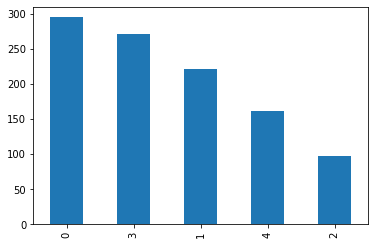

In [30]:
resultdf = pd.DataFrame(kmeans.labels_)
resultdf.iloc[:,0].value_counts().plot.bar()

In [31]:
from sklearn.cluster import AgglomerativeClustering

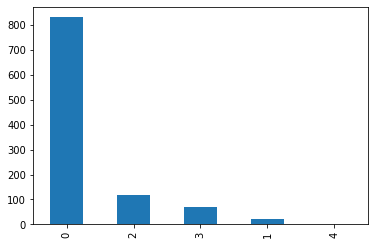

In [32]:
cluster = AgglomerativeClustering(n_clusters=clusters_count, linkage="average").fit(x_train)
resultdf = pd.DataFrame(cluster.labels_)
resultdf.iloc[:,0].value_counts().plot.bar()

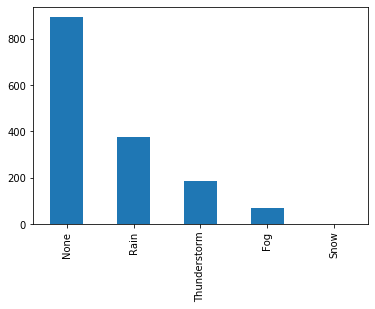

In [33]:
events_prepared.sum().sort_values(ascending=False).plot.bar()

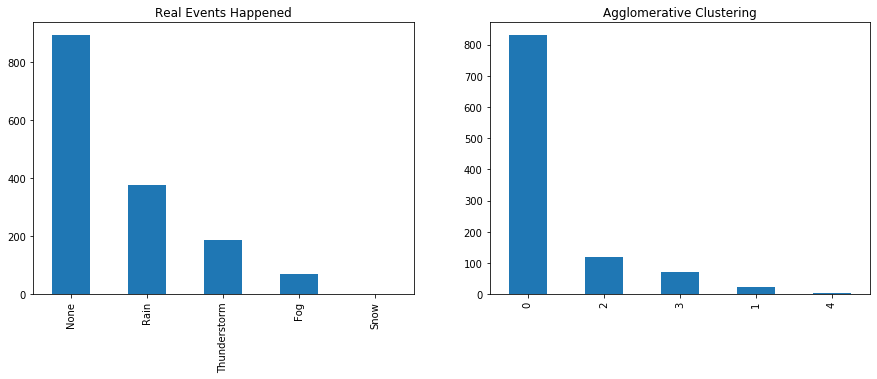

In [34]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
events_prepared.sum().sort_values(ascending = False).plot.bar(ax = ax[0], title = "Real Events Happened")
resultdf.iloc[:,0].value_counts().plot.bar(ax= ax[1], title = "Agglomerative Clustering")

In [35]:
events_names_occured = events_prepared.sum().sort_values(ascending = False).index
clusters_ordered = resultdf.iloc[:,0].value_counts().index

In [36]:
cluster_category_mapping = {}
for i in range(clusters_count):
    cluster_category_mapping.update({clusters_ordered[i]:events_names_occured[i]})
cluster_category_mapping

{0: 'None', 2: 'Rain', 3: 'Thunderstorm', 1: 'Fog', 4: 'Snow'}

In [37]:
cluster_centers_mapping = {}
for key in cluster_category_mapping:
    cluster_indices = resultdf.loc[resultdf[0] == key].index
    cluster_data = x_train.iloc[cluster_indices]
    mean = cluster_data.mean(axis = 0).values
    cluster_centers_mapping.update({key:mean})
cluster_centers_mapping

{0: array([0.68081702, 0.72501772, 0.52876076, 0.39179913, 0.94533133,
        0.36254107, 0.        , 0.        ]),
 2: array([0.45722987, 0.65852443, 0.80254237, 0.41354508, 0.5095339 ,
        0.36132512, 0.        , 0.        ]),
 3: array([0.73833627, 0.8415493 , 0.64607646, 0.3476151 , 0.92253521,
        0.40076825, 0.        , 1.        ]),
 1: array([0.37024457, 0.43542199, 0.48757764, 0.55644867, 0.98369565,
        0.43478261, 0.        , 1.        ]),
 4: array([0.44791667, 0.67156863, 0.82380952, 0.46218487, 0.45833333,
        0.27272727, 0.        , 1.        ])}

In [38]:
def get_distances_from_cluster(data_frame):
    cluster_distance = np.zeros((data_frame.shape[0], clusters_count))
    for i in range(data_frame.shape[0]):
        for key in cluster_category_mapping:
            dist = np.linalg.norm(data_frame.iloc[[i]].values[0]-cluster_centers_mapping[key])
            cluster_distance[i, key] = dist
    columns_names = [cluster_category_mapping[k] for k in cluster_category_mapping]
    
    return pd.DataFrame(cluster_distance, index = data_frame.index, columns = columns_names)
distancesdf = get_distances_from_cluster(x_train)
distancesdf.head()

,None,Rain,Thunderstorm,Fog,Snow
410,0.858156,1.305049,0.382880,1.328515,1.042206
44,0.794084,1.146016,0.451173,1.325744,1.109072
1082,0.648285,1.159072,0.298726,1.213946,1.037079
795,0.588886,1.027721,0.801834,1.248726,1.325266
1246,0.283670,1.212866,0.526944,1.014003,1.152626


In [39]:
def classify_events(distances_dataframe):
    return distances_dataframe.apply(lambda x: x<x.min()*1.02, axis = 1)
classification_result = classify_events(distancesdf)
x_train_col_ordered = classification_result.reindex(sorted(classification_result.columns), axis = 1)
y_train_col_ordered = y_train.reindex(sorted(y_train.columns), axis = 1)


In [40]:
def check_accuracy(x,y):
    comparision = x == y
    
    val_counts = comparision.all(axis = 1).value_counts()
    percentagecorrect = val_counts.at[True]/x.shape[0]*100
    return percentagecorrect

In [41]:
check_accuracy(x_train_col_ordered, y_train_col_ordered)

62.20095693779905

In [42]:
x_train_col_ordered.head()

,Fog,None,Rain,Snow,Thunderstorm
410,False,False,False,False,True
44,False,False,False,False,True
1082,False,False,False,False,True
795,False,True,False,False,False
1246,False,True,False,False,False


In [43]:
y_train_col_ordered.head()

,Fog,None,Rain,Snow,Thunderstorm
410,False,False,True,False,False
44,False,True,False,False,False
1082,False,True,False,False,False
795,False,True,False,False,False
1246,False,False,True,False,True


# PREDICTED WEATHER EVENTS BASED ON AGGLOMERATIVE CLUSTERING

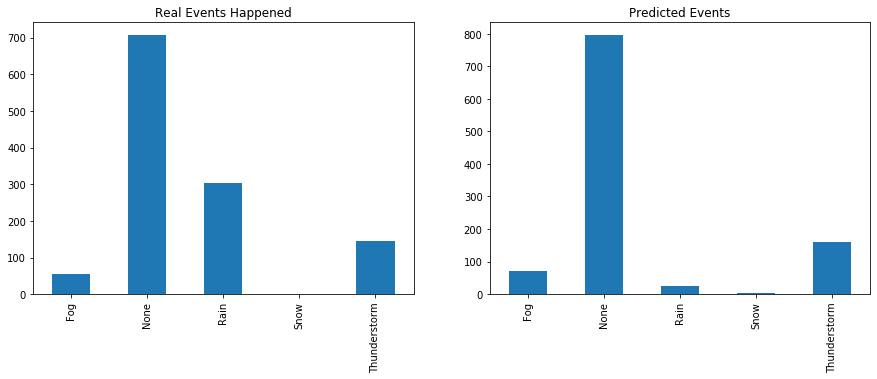

In [44]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
y_train_col_ordered.sum().plot.bar(ax = ax[0], title = "Real Events Happened")
x_train_col_ordered.sum().plot.bar(ax = ax[1], title = "Predicted Events")

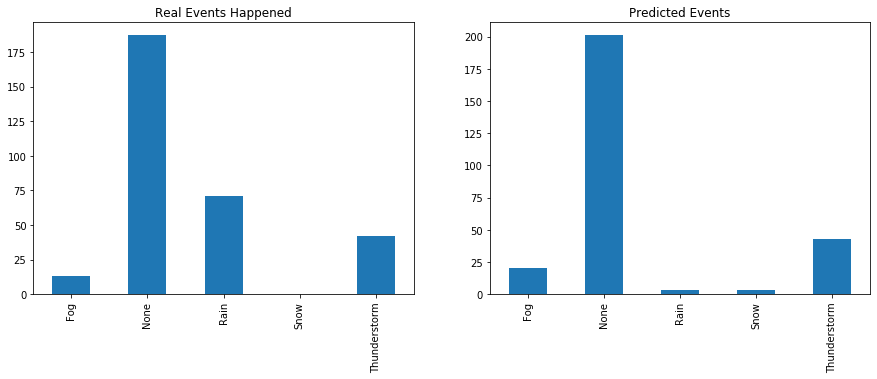

In [45]:
distancesdf = get_distances_from_cluster(x_test)
classification_result = classify_events(distancesdf)
x_test_col_ordered = classification_result.reindex(sorted(classification_result.columns), axis = 1)
y_test_col_ordered = y_test.reindex(sorted(y_train.columns), axis = 1)

fig, ax = plt.subplots(1,2,figsize = (15,5))
y_test_col_ordered.sum().plot.bar(ax = ax[0], title = "Real Events Happened")
x_test_col_ordered.sum().plot.bar(ax = ax[1], title = "Predicted Events")

In [46]:
check_accuracy(x_test_col_ordered, y_test_col_ordered)

62.97709923664122